## 数据变换与规约

### 归一化处理

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rc("font",family='PingFang HK')
def plot_height_weight(data):
    """
    绘制身高和体重的散点图。
    参数:
    data (numpy.ndarray): 包含身高和体重数据的二维数组。
    """
    # 确保 data 是一个二维数组
    if len(data.shape) != 2 or data.shape[1] != 2:
        raise ValueError("数据必须是二维数组，且每行包含两个值（身高和体重）。")
    # 提取身高和体重数据
    heights = data[:, 0]
    weights = data[:, 1]
    # 创建一个新的图形
    plt.figure(figsize=(10, 6))

    # 绘制散点图
    plt.scatter(heights, weights, color='blue', marker='o', edgecolors='black')

    # 添加标题和轴标签
    plt.title('身高与体重关系图')
    plt.xlabel('身高 (cm)')
    plt.ylabel('体重 (kg)')

    # 添加网格线
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # 自动调整子图参数，使之填充整个图像区域
    plt.tight_layout()

    # 显示图形
    plt.show()

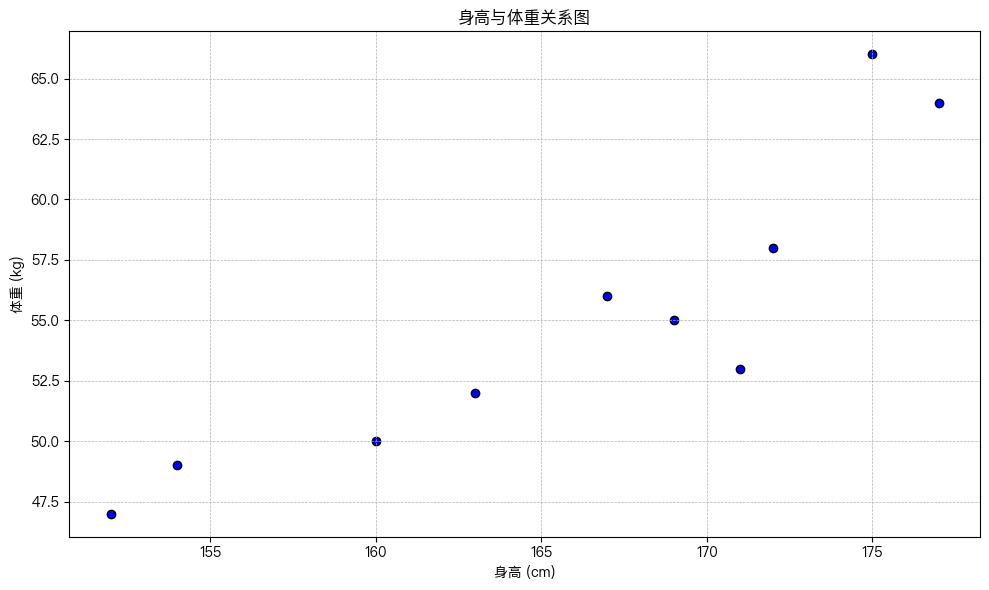

In [ ]:
rd = pd.read_excel("./height_weight.xlsx")
rd = np.array(rd)
plot_height_weight(rd)

- 最大最小规范化

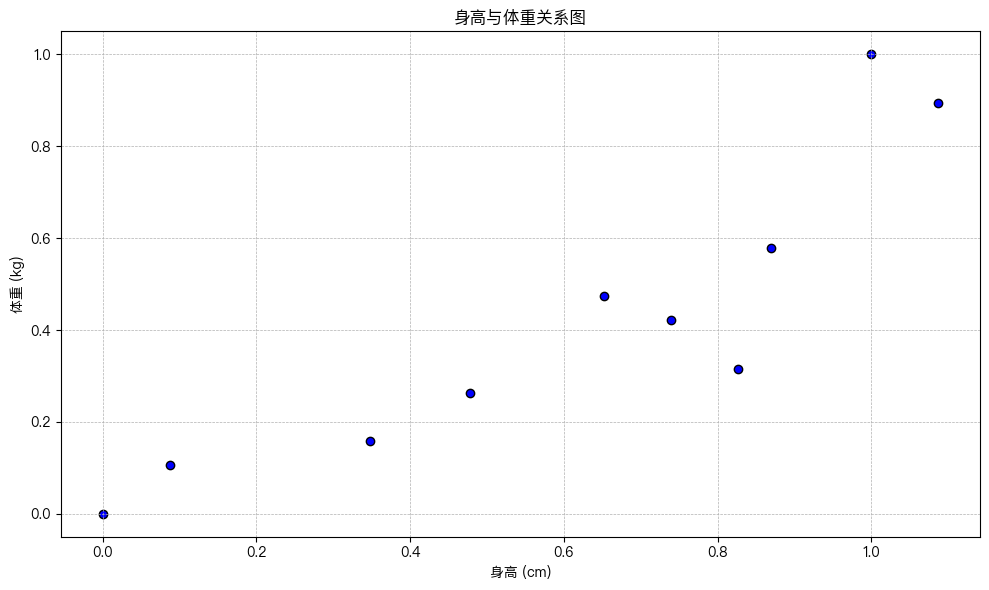

In [ ]:
ahat = (rd-np.min(rd,axis=0)) / (np.max(rd,axis=0)-np.min(rd,axis=0))
plot_height_weight(ahat)

- Z-score标准化

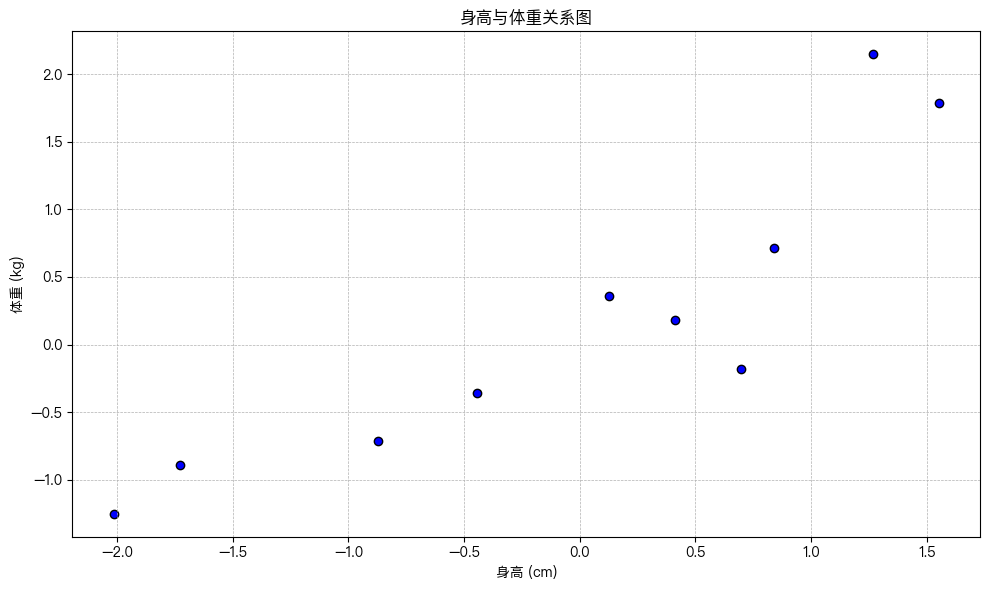

In [ ]:
azscore=(rd-np.mean(a,axis=0)) / np.std(a,axis=0)
plot_height_weight(azscore)

- 欠采样、过采样 与 数据规约

### 有重复和无重复的采样

In [ ]:
data = pd.read_excel("./height_weight.xlsx")
data = np.array(data)

[1, 2, 3, 5, 8]


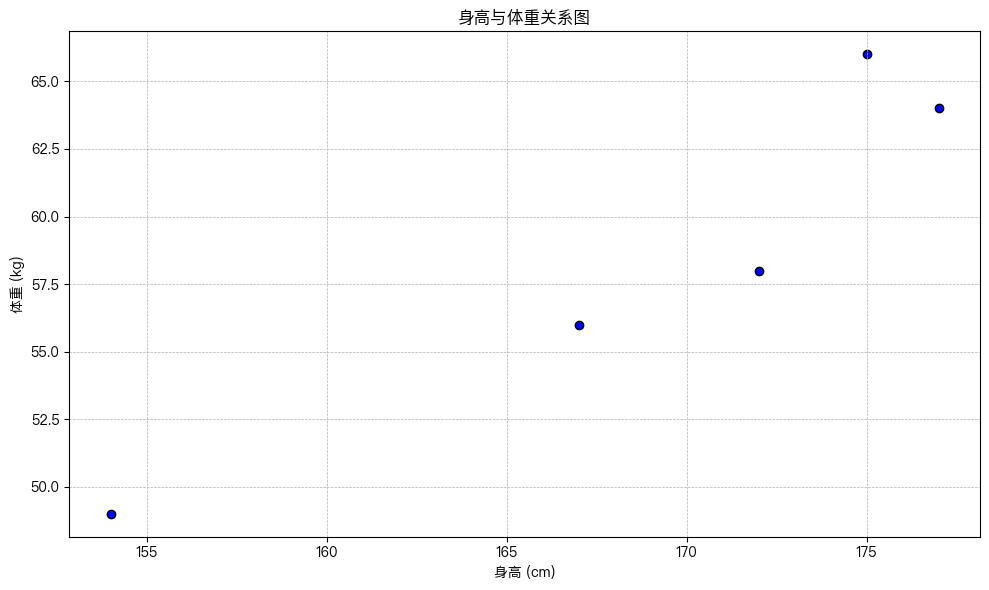

In [ ]:
import random as rd
index=rd.sample(range(len(data)-1),5)
b=data[sorted(index)]
print(sorted(index))
plot_height_weight(b)

[6, 5, 7, 0, 6, 1, 4, 4]


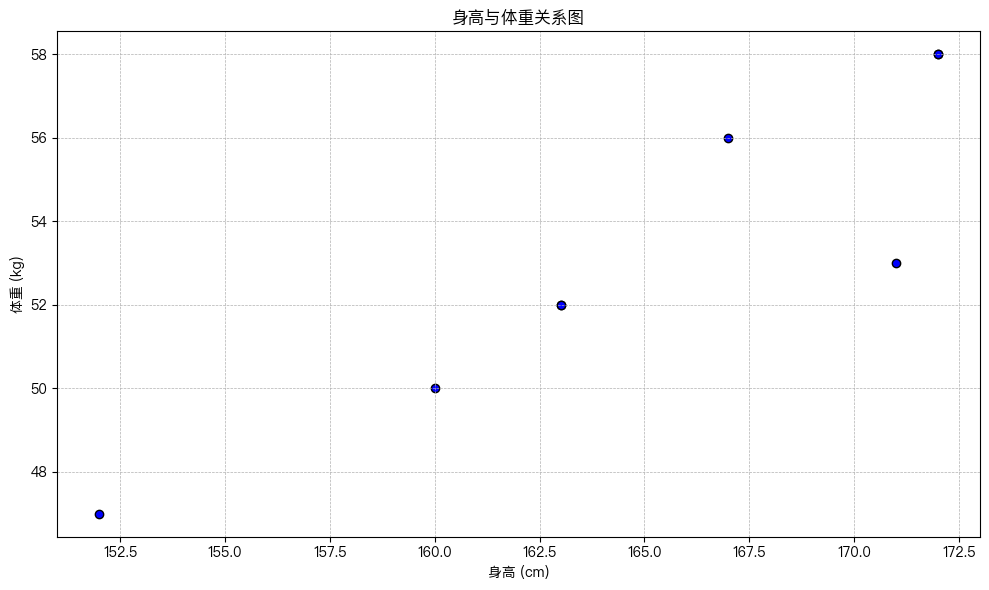

In [ ]:
index=[rd.randint(0,8) for i in range(8)]
print(index)
c=a[index]
plot_height_weight(c)

## 过采样

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
x1=[np.random.randint(1,31) for i in range(90)]+[np.random.randint(50,81) for i in range(10)]
x2=[np.random.randint(1,31) for i in range(90)]+[np.random.randint(50,81) for i in range(10)]
y=[0 for i in range(90)]+[1 for i in range(10)]
x=pd.DataFrame({'x1':x1,'x2':x2})
y=pd.DataFrame(y)
print(x.head())
print(y.head())

   x1  x2
0  28   7
1  16  12
2  18  14
3  12   7
4  25  12
   0
0  0
1  0
2  0
3  0
4  0


Counter({0: 90, 1: 10})


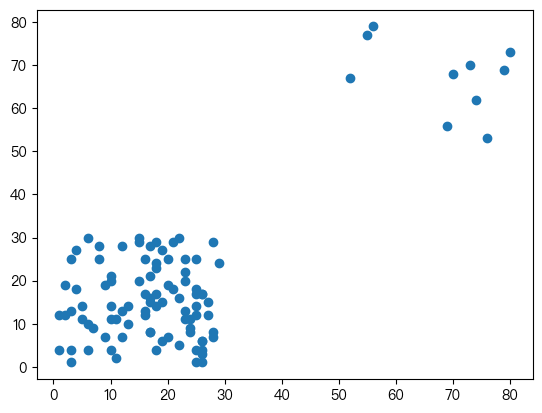

In [ ]:
print(Counter(list(y[0])))
fig1=plt.figure(1)
plt.scatter(x['x1'],x['x2'])
plt.show()

Counter({0: 90, 1: 90})


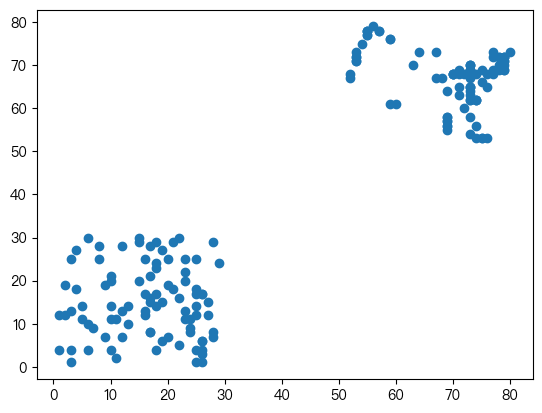

In [ ]:
smo=SMOTE(sampling_strategy='auto', random_state=1)
x_smo, y_smo = smo.fit_resample(x, y)
print(Counter(list(y_smo[0])))
plt.scatter(x_smo['x1'],x_smo['x2'])
plt.show()